In steady state the heat equation takes the form of a Laplace equation
$$
\nabla^2 T = \partial_t T = 0
$$

Using finite differences it looks like
$$
\frac{T(x-\Delta x)+T(h+\Delta x)-2 T(x)}{\Delta x^2} = 0
$$
where $dx$ does not matter, because it can be factored out.

The $-2$ on the central element and the $1$ on the side elements are represented as a matrix operation for all $x$ by the Laplace kernel:

$$
\begin{pmatrix}
 -2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 1 & -2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & -2 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -2 \\
\end{pmatrix} \cdot T = const
$$

That constants on the left-hand side are determined by the static boundary conditions
$$
-2 T_0 + T_1  = - T(0)
$$
$$
-2 T_n + T_{n-1} = - T(L)
$$

This makes the constant vector
$$
\begin{pmatrix}
-T(0) \\
0 \\ 0 \\ \vdots \\ 0 \\ 0 \\ -T(L)
\end{pmatrix}
$$

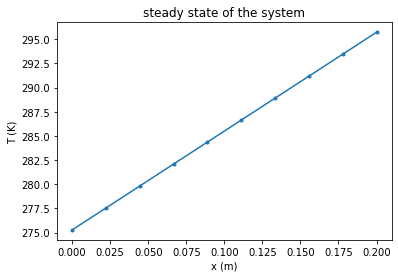

In [140]:
import numpy as np
import matplotlib.pyplot as plt

M = 9
# create Laplace kernel A
A = np.zeros((M+1,M+1)) 
# Fill diagonal
A.ravel()[::M+2] = -2 
# Fill upper and lower diagonal bands
A.ravel()[1::M+2] = 1 
A.ravel()[M+1::M+2] = 1

# boundary conditions, negative
boundary = np.zeros(M+1)
boundary[0] = -273
boundary[-1] = -298

solution = np.linalg.inv(A) @ boundary

plt.plot(np.linspace(0,0.2,len(solution)),solution,".-")
plt.xlabel("x (m)")
plt.ylabel("T (K)")
plt.title("steady state of the system")
plt.savefig("T_vs_x.pdf")

Analysis: The steady state of the heat equation was solved by inverting the Laplace kernel in matrix form, given a perfect line.
That represents the equilibrium reached between two points at different temperature.

Given the simple nature of this curve, there would be not much improvement by incrementing the number of points in the grid.